**Вардумян А.Т. ИУ5-61Б**

<a id='0'></a>
# Оглавление

2. [Задание](#1)<br>
3. [Описание датасета](#2)<br>
4. [Импорт библиотек](#3)<br>
5. [Загрузка и первичный анализ данных](#4)<br>
6. [Обработка пропусков в данных](#5)<br>
7. [Кодирование категориальных признаков](#6)<br>
8. [Масштабирование данных](#7)<br>

<a id="1"></a>
# Задание ([к оглавлению](#0))

Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)

Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
- обработку пропусков в данных;
- кодирование категориальных признаков;
- масштабирование данных.

<a id="2"></a>
# Описание датасета ([к оглавлению](#0))

**`Description`**

No one can deny that mass shootings are a tragedy. They tear families apart, destroy communities, and leave everyone affected reeling for a long time afterwards.
This dataset seeks to catalog every mass shooting in the United States since 1970. It includes information on the location, date, number of fatalities and injuries, as well as other details about the incident.
Looking at this data, it's clear that mass shootings are becoming more and more common. In the last decade alone, there have been over 300 mass shootings in the US. That's an average of one mass shooting every two weeks.
What's even more sobering is that these numbers are only increasing. In 2017 so far, there have already been 273 mass shootings - that's on track to be the deadliest year on record for mass shootings in America.
So what can be done to prevent these tragedies from happening? That's a question that experts have been grappling with for years, and unfortunately there isn't a simple answer. But by understanding more about these events - like where they happen and who is carrying out the attacks - we can hopefully start to make headway in preventing them from happening in the future

**`Data Manual`**
- *index*: A unique identifier for each row
- *case*: The name of the mass shooting
- *location*: The location of the mass shooting
- *date*: The date of the mass shooting
- *summary*: A brief summary of the mass shooting
- *fatalities*: The number of people killed in the mass shooting
- *injured*: The number of people injured in the mass shooting
- *total_victims*: The total number of people killed and injured in the mass shooting
- *location.1*: The city and state of the mass shooting
- *ageofshooter*: The age of the shooter
- *priorsignsmentalhealthissues*: Whether or not the shooter showed signs of mental health issues before the shooting
- *mentalhealthdetails*: Details about the shooter's mental health
- *weaponsobtainedlegally*: Whether or not the weapons used in the shooting were obtained legally
- *where_obtained*: Where the weapons used in the shooting were obtained
- *weapon_type*: The type of weapon used in the shooting
- *weapon_details*: Details about the weapon used in the shooting
- *race*: The race of the shooter
- *gender*: The gender of the shooter
- *sources*: The sources used for the information in the dataset
- *mentalhealthsources*: The sources used for the mental health information in the dataset
- *sourcesadditionalage*: The sources used for the shooter's age
- *latitude*: The latitude of the location of the mass shooting
- *longitude*: The longitude of the location of the mass shooting
- *type*: The type of mass shooting
- *year*: The year of the mass shooting

<a id="3"></a>
# Импорт библиотек ([к оглавлению](#0))

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id="4"></a>
# Загрузка и первичный анализ данных ([к оглавлению](#0))

In [2]:
df = pd.read_csv("mass_shootings.csv", sep=",", index_col="index")
df.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,mental_health_sources,sources_additional_age,latitude,longitude,type,year,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
index,,,,,,,,,,,,,,,,,,,,,
0,Sacramento County church shooting,"Sacramento, California",02/28/22,"""A man believed to be meeting his three childr...",4.0,0.0,4.0,Religious,-,-,...,-,-,38.601110,-121.418966,Mass,2022.0,NaN,NaN,NaN,NaN
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4.0,7.0,11.0,School,15,-,...,-,-,42.844108,-83.259928,Mass,2021.0,NaN,NaN,NaN,NaN
2,San Jose VTA shooting,"San Jose, California",05/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9.0,0.0,9.0,Workplace,57,yes,...,https://www.nytimes.com/2021/05/26/us/what-hap...,-,37.316097,-121.888533,Mass,2021.0,NaN,NaN,NaN,NaN
3,FedEx warehouse shooting,"Indianapolis, Indiana",04/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8.0,7.0,15.0,Workplace,19,yes,...,https://www.nytimes.com/2021/04/19/us/indianap...,-,39.686630,-86.323130,Mass,2021.0,NaN,NaN,NaN,NaN
4,Orange office complex shooting,"Orange, California",03/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4.0,1.0,5.0,Workplace,-,-,...,-,-,33.835420,-117.853790,Mass,2021.0,NaN,NaN,NaN,NaN


In [3]:
df = df[df!="-"]
df.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,mental_health_sources,sources_additional_age,latitude,longitude,type,year,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
index,,,,,,,,,,,,,,,,,,,,,
0,Sacramento County church shooting,"Sacramento, California",02/28/22,"""A man believed to be meeting his three childr...",4.0,0.0,4.0,Religious,NaN,NaN,...,NaN,NaN,38.601110,-121.418966,Mass,2022.0,NaN,NaN,NaN,NaN
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4.0,7.0,11.0,School,15,NaN,...,NaN,NaN,42.844108,-83.259928,Mass,2021.0,NaN,NaN,NaN,NaN
2,San Jose VTA shooting,"San Jose, California",05/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9.0,0.0,9.0,Workplace,57,yes,...,https://www.nytimes.com/2021/05/26/us/what-hap...,NaN,37.316097,-121.888533,Mass,2021.0,NaN,NaN,NaN,NaN
3,FedEx warehouse shooting,"Indianapolis, Indiana",04/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8.0,7.0,15.0,Workplace,19,yes,...,https://www.nytimes.com/2021/04/19/us/indianap...,NaN,39.686630,-86.323130,Mass,2021.0,NaN,NaN,NaN,NaN
4,Orange office complex shooting,"Orange, California",03/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4.0,1.0,5.0,Workplace,NaN,NaN,...,NaN,NaN,33.835420,-117.853790,Mass,2021.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(126, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case                              126 non-null    object 
 1   location                          126 non-null    object 
 2   date                              126 non-null    object 
 3   summary                           126 non-null    object 
 4   fatalities                        126 non-null    float64
 5   injured                           126 non-null    float64
 6   total_victims                     126 non-null    float64
 7   location.1                        126 non-null    object 
 8   age_of_shooter                    122 non-null    object 
 9   prior_signs_mental_health_issues  109 non-null    object 
 10  mental_health_details             96 non-null     object 
 11  weapons_obtained_legally          115 non-null    object 
 12  where_ob

In [6]:
# Удалим ненужные колонки
df = df.drop([
    "mental_health_sources",
    "sources",
    "sources_additional_age",
    "latitude",
    "longitude",
    "year",
    "summary",
    "mental_health_details",
    "where_obtained",
    "type",
    "gender",
    "weapon_type",
    "weapon_details",
    "prior_signs_mental_health_issues",
    "weapons_obtained_legally"
], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case            126 non-null    object 
 1   location        126 non-null    object 
 2   date            126 non-null    object 
 3   fatalities      126 non-null    float64
 4   injured         126 non-null    float64
 5   total_victims   126 non-null    float64
 6   location.1      126 non-null    object 
 7   age_of_shooter  122 non-null    object 
 8   race            115 non-null    object 
 9   Unnamed: 24     0 non-null      float64
 10  Unnamed: 25     0 non-null      float64
 11  Unnamed: 26     0 non-null      float64
 12  Unnamed: 27     0 non-null      float64
dtypes: float64(7), object(6)
memory usage: 13.8+ KB


In [7]:
# обрабатываем строки
df["age_of_shooter"] = pd.to_numeric(df["age_of_shooter"])
df["location.1"] = df["location.1"].str.lower().str.strip()
df["race"] = df["race"].str.lower().str.strip()

<a id="5"></a>
# Обработка пропусков в данных ([к оглавлению](#0))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case            126 non-null    object 
 1   location        126 non-null    object 
 2   date            126 non-null    object 
 3   fatalities      126 non-null    float64
 4   injured         126 non-null    float64
 5   total_victims   126 non-null    float64
 6   location.1      126 non-null    object 
 7   age_of_shooter  122 non-null    float64
 8   race            115 non-null    object 
 9   Unnamed: 24     0 non-null      float64
 10  Unnamed: 25     0 non-null      float64
 11  Unnamed: 26     0 non-null      float64
 12  Unnamed: 27     0 non-null      float64
dtypes: float64(8), object(5)
memory usage: 13.8+ KB


In [9]:
# Удалим колонки с полностью пустыми значениями
df = df.dropna(how="all", axis=1)

In [10]:
# Количество пустых значений
total_count = df.shape[0]
result = pd.DataFrame()

num_cols = []
cat_cols = []

for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    temp_perc = round((temp_null_count / total_count) * 100.0, 2)
    dt = str(df[col].dtype)
    
    if temp_null_count > 0:
        if dt=='object':
            cat_cols.append(col)
        if dt=='float64' or dt=='int64':
            num_cols.append(col)
            
    row = pd.DataFrame({
        "Column": [col],
        "Null Fields Count": [temp_null_count],
        "Null Percentage": [temp_perc],
    })
    result = pd.concat([result, row], ignore_index=True, axis=0)

result  

,Column,Null Fields Count,Null Percentage
0,case,0,0.00
1,location,0,0.00
2,date,0,0.00
3,fatalities,0,0.00
4,injured,0,0.00
5,total_victims,0,0.00
6,location.1,0,0.00
7,age_of_shooter,4,3.17
8,race,11,8.73


## Числовые признаки

In [11]:
df_num = df[num_cols]
df_num

,age_of_shooter
index,
0,NaN
1,15.0
2,57.0
3,19.0
4,NaN
...,...
121,59.0
122,44.0
123,41.0


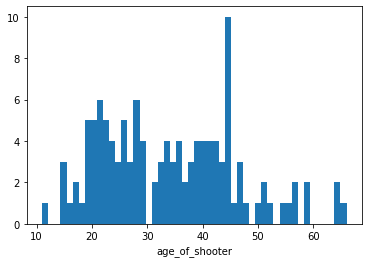

In [12]:
plt.hist(df["age_of_shooter"], 50)
plt.xlabel("age_of_shooter")
plt.show()

In [13]:
imp_num = SimpleImputer(strategy="median")
data_num_imp = imp_num.fit_transform(df_num)
df["age_of_shooter"] = data_num_imp
df["age_of_shooter"].isnull().sum()

0

## Категориальные признаки

In [14]:
df_cat = df[cat_cols]
df_cat["race"].unique()

array([nan, 'white', 'black', 'latino', 'asian', 'other',
       'native american', 'unclear'], dtype=object)

In [15]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_cat_imp = imp_cat.fit_transform(df_cat)
df["race"] = data_cat_imp
df["race"].isnull().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case            126 non-null    object 
 1   location        126 non-null    object 
 2   date            126 non-null    object 
 3   fatalities      126 non-null    float64
 4   injured         126 non-null    float64
 5   total_victims   126 non-null    float64
 6   location.1      126 non-null    object 
 7   age_of_shooter  126 non-null    float64
 8   race            126 non-null    object 
dtypes: float64(4), object(5)
memory usage: 9.8+ KB


<a id="6"></a>
# Кодирование категориальных признаков ([к оглавлению](#0))

In [17]:
df.head()

,case,location,date,fatalities,injured,total_victims,location.1,age_of_shooter,race
index,,,,,,,,,
0,Sacramento County church shooting,"Sacramento, California",02/28/22,4.0,0.0,4.0,religious,34.0,white
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,4.0,7.0,11.0,school,15.0,white
2,San Jose VTA shooting,"San Jose, California",05/26/21,9.0,0.0,9.0,workplace,57.0,white
3,FedEx warehouse shooting,"Indianapolis, Indiana",04/15/21,8.0,7.0,15.0,workplace,19.0,white
4,Orange office complex shooting,"Orange, California",03/31/21,4.0,1.0,5.0,workplace,34.0,white


In [18]:
cat_enc = df[["location.1", "race"]]

In [19]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc)
ohe.categories_

[array(['airport', 'military', 'other', 'religious', 'school', 'workplace'],
       dtype=object),
 array(['asian', 'black', 'latino', 'native american', 'other', 'unclear',
        'white'], dtype=object)]

In [20]:
ohe.inverse_transform(cat_enc_ohe.todense()[0:10])

array([['religious', 'white'],
       ['school', 'white'],
       ['workplace', 'white'],
       ['workplace', 'white'],
       ['workplace', 'white'],
       ['workplace', 'white'],
       ['workplace', 'white'],
       ['workplace', 'white'],
       ['workplace', 'black'],
       ['other', 'black']], dtype=object)

<a id="7"></a>
# Масштабирование данных ([к оглавлению](#0))

In [21]:
df.head()

,case,location,date,fatalities,injured,total_victims,location.1,age_of_shooter,race
index,,,,,,,,,
0,Sacramento County church shooting,"Sacramento, California",02/28/22,4.0,0.0,4.0,religious,34.0,white
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,4.0,7.0,11.0,school,15.0,white
2,San Jose VTA shooting,"San Jose, California",05/26/21,9.0,0.0,9.0,workplace,57.0,white
3,FedEx warehouse shooting,"Indianapolis, Indiana",04/15/21,8.0,7.0,15.0,workplace,19.0,white
4,Orange office complex shooting,"Orange, California",03/31/21,4.0,1.0,5.0,workplace,34.0,white


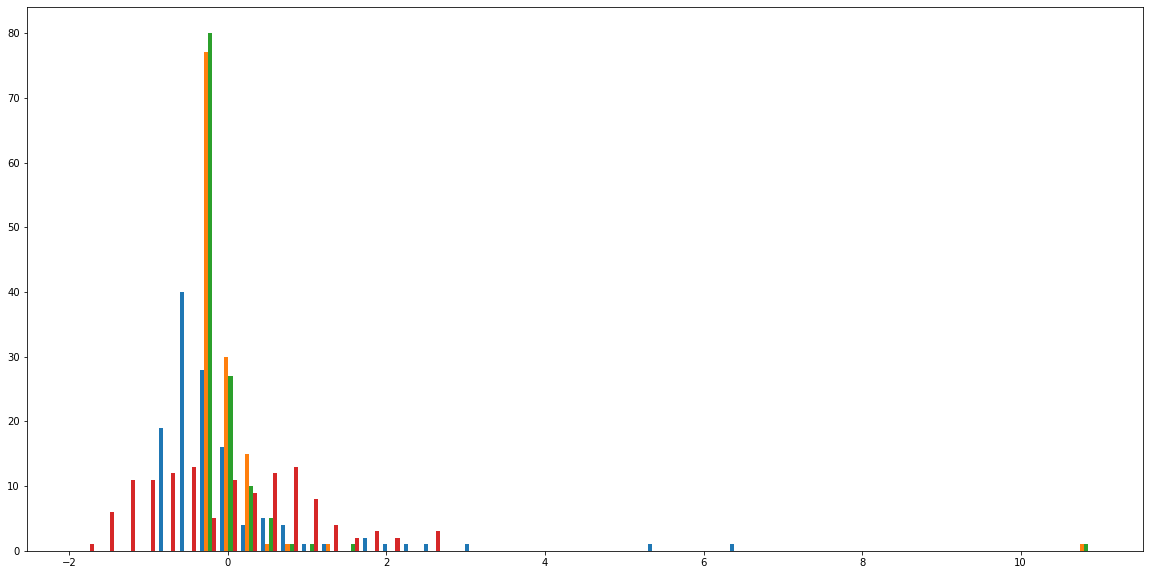

In [22]:
scale_features = [
    "fatalities",
    "injured",
    "total_victims",
    "age_of_shooter"
]

scaler = StandardScaler()
scaler_data = scaler.fit_transform(df[scale_features])

data = pd.DataFrame(scaler_data, columns=scale_features)
plt.figure(figsize=(20, 10))
plt.hist(data, 50)
plt.show()

In [23]:
df[scale_features] = data
df

,case,location,date,fatalities,injured,total_victims,location.1,age_of_shooter,race
index,,,,,,,,,
0,Sacramento County church shooting,"Sacramento, California",02/28/22,-0.516003,-0.236776,-0.286341,religious,0.000000,white
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,-0.516003,-0.093639,-0.157422,school,-1.584994,white
2,San Jose VTA shooting,"San Jose, California",05/26/21,0.134161,-0.236776,-0.194256,workplace,1.918677,white
3,FedEx warehouse shooting,"Indianapolis, Indiana",04/15/21,0.004128,-0.093639,-0.083754,workplace,-1.251311,white
4,Orange office complex shooting,"Orange, California",03/31/21,-0.516003,-0.216327,-0.267924,workplace,0.000000,white
...,...,...,...,...,...,...,...,...,...
121,Shopping centers spree killings,"Palm Bay, Florida",04-23-87,-0.255937,0.049497,0.008332,other,2.085518,white
122,United States Postal Service shooting,"Edmond, Oklahoma",08-20-86,0.914357,-0.114087,0.026749,workplace,0.834207,white
123,San Ysidro McDonald's massacre,"San Ysidro, California",07-18-84,1.824586,0.151738,0.395090,other,0.583945,white
